# IBM-Attrition Project

### **Description**: The aim of the project is to build a robust machine learning pipeline to predict whether certain employees of IBM Ghana will leave company or not. The predictive modelling will be done after a comprehensive analysis of the dataset provided by the business team.

### Features

- Age: Age of employee
- Attrition: Employee attrition status
- Department: Department of work
- DistanceFromHome
- Education: 1-Below College; 2- College; 3-Bachelor; 4-Master; 5-Doctor;
- EducationField
- EnvironmentSatisfaction: 1-Low; 2-Medium; 3-High; 4-Very High;
- JobSatisfaction: 1-Low; 2-Medium; 3-High; 4-Very High;
- MaritalStatus
- MonthlyIncome
- NumCompaniesWorked: Number of companies worked prior to IBM
- WorkLifeBalance: 1-Bad; 2-Good; 3-Better; 4-Best;
- YearsAtCompany: Current years of service in IBM

#### **Null Hypothesis**: There appears not to be a relationship between the rate at which employees leave the company and the number of years they have been employed

#### **Alternate Hypothesis**: There is a definitive relationship that exist between employee attrition and the number of year they have spent at IBM.


#### Analytical Questions

1. Which department is more likely yo leave the departments?
2. What is the percentage of Attrition for IBM?
3. How satisfied are employees after 3 years at IMB?
4. Which department has the highest salary?
5. Does marital status affect attrition rate?
6. Does distance from the office affect attrition rate?

## Importations

In [1]:
# Data Manipulations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load Data

In [2]:
df = pd.read_csv('attrition_data_ibm.csv')
df.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany,ColumnX
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993.0,8,1.0,6.0,NaN
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130.0,1,3.0,10.0,NaN
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090.0,6,3.0,0.0,NaN
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909.0,1,3.0,8.0,NaN
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468.0,9,3.0,2.0,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      1470 non-null   int64  
 1   Attrition                1470 non-null   object 
 2   Department               1465 non-null   object 
 3   DistanceFromHome         1470 non-null   int64  
 4   Education                1470 non-null   int64  
 5   EducationField           1468 non-null   object 
 6   EnvironmentSatisfaction  1470 non-null   int64  
 7   JobSatisfaction          1470 non-null   int64  
 8   MaritalStatus            1467 non-null   object 
 9   MonthlyIncome            1467 non-null   float64
 10  NumCompaniesWorked       1470 non-null   int64  
 11  WorkLifeBalance          1469 non-null   float64
 12  YearsAtCompany           1468 non-null   float64
 13  ColumnX                  0 non-null      float64
dtypes: float64(4), int64(6),

In [4]:
df.isna().sum()

Age                           0
Attrition                     0
Department                    5
DistanceFromHome              0
Education                     0
EducationField                2
EnvironmentSatisfaction       0
JobSatisfaction               0
MaritalStatus                 3
MonthlyIncome                 3
NumCompaniesWorked            0
WorkLifeBalance               1
YearsAtCompany                2
ColumnX                    1470
dtype: int64

In [5]:
df = df.drop('ColumnX', axis=1)
df.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993.0,8,1.0,6.0
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130.0,1,3.0,10.0
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090.0,6,3.0,0.0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909.0,1,3.0,8.0
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468.0,9,3.0,2.0


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.0,60.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.0,29.0
Education,1470.0,2.912925,1.024165,1.0,2.0,3.0,4.0,5.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.0,3.0,4.0,4.0
JobSatisfaction,1470.0,2.728571,1.102846,1.0,2.0,3.0,4.0,4.0
MonthlyIncome,1467.0,6509.758010,4710.217686,1009.0,2911.0,4936.0,8380.5,19999.0
NumCompaniesWorked,1470.0,2.693197,2.498009,0.0,1.0,2.0,4.0,9.0
WorkLifeBalance,1469.0,2.761743,0.706437,1.0,2.0,3.0,3.0,4.0
YearsAtCompany,1468.0,7.014305,6.128186,0.0,3.0,5.0,9.0,40.0


In [7]:
df.describe(include='object').T  

,count,unique,top,freq
Attrition,1470,2,No,1233
Department,1465,3,Research & Development,956
EducationField,1468,6,Life Sciences,606
MaritalStatus,1467,3,Married,671


In [8]:
df.duplicated().sum()

0

In [9]:
df['Age'].unique()

array([41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 29, 31, 34, 28, 22, 53,
       24, 21, 42, 44, 46, 39, 43, 50, 26, 48, 55, 45, 56, 23, 51, 40, 54,
       58, 20, 25, 19, 57, 52, 47, 18, 60], dtype=int64)

In [10]:
df['DistanceFromHome'].unique()

array([ 1,  8,  2,  3, 24, 23, 27, 16, 15, 26, 19, 21,  5, 11,  9,  7,  6,
       10,  4, 25, 12, 18, 29, 22, 14, 20, 28, 17, 13], dtype=int64)

In [11]:
df['MonthlyIncome'].unique()           

array([5993., 5130., 2090., ..., 9991., 5390., 4404.])

In [12]:
df['WorkLifeBalance'].unique() 

array([ 1.,  3.,  2., nan,  4.])

### Univariate Analysis

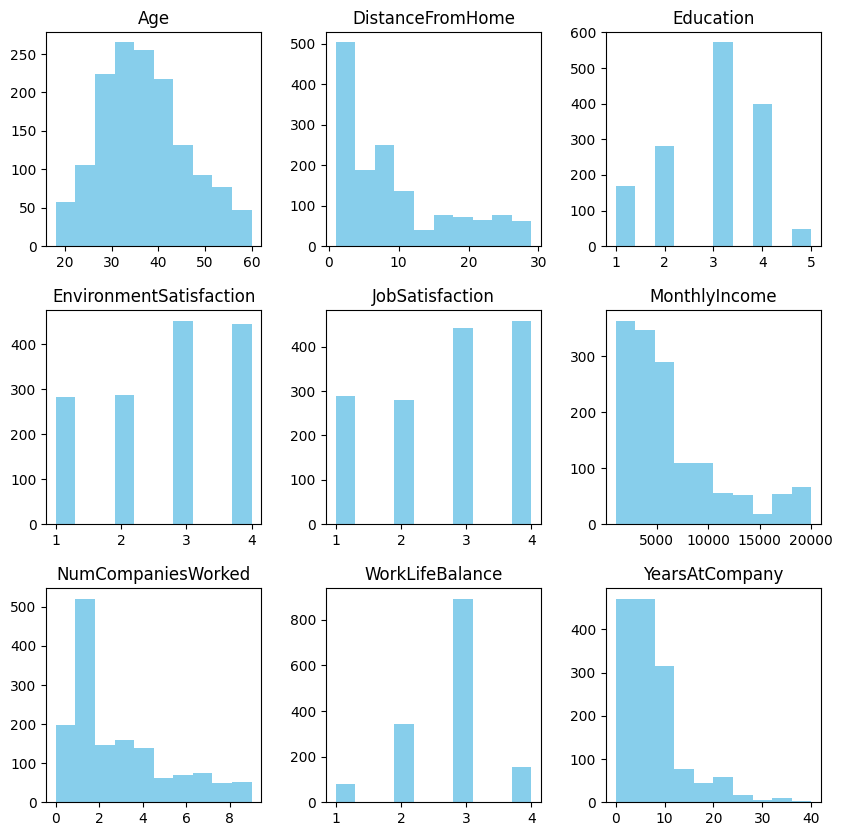

In [13]:
df.hist(figsize=(10, 10), grid=False, color='skyblue')
plt.show()

Add KDE plots to see a smoother representation of the distribution of the features

<Axes: ylabel='Density'>

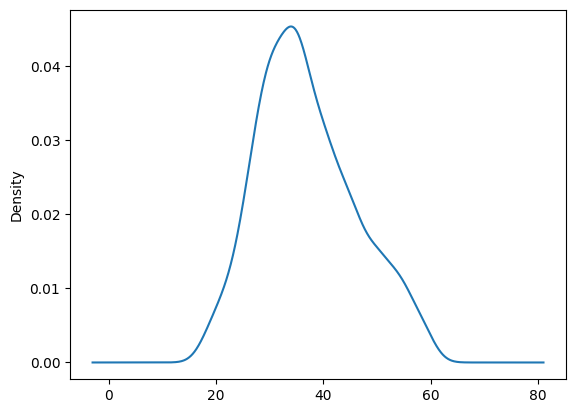

In [14]:
df['Age'].plot(kind='kde')

<Axes: ylabel='Density'>

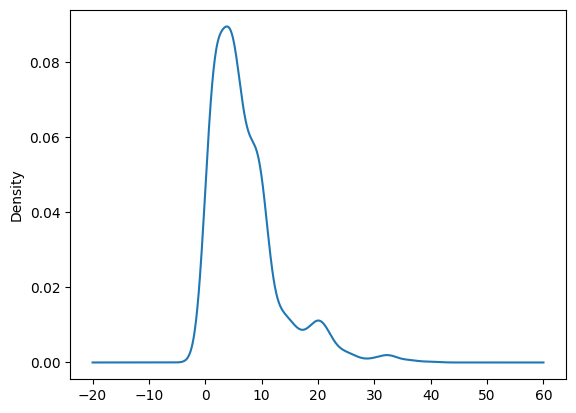

In [15]:
df['YearsAtCompany'].plot(kind='kde')

<Axes: ylabel='Density'>

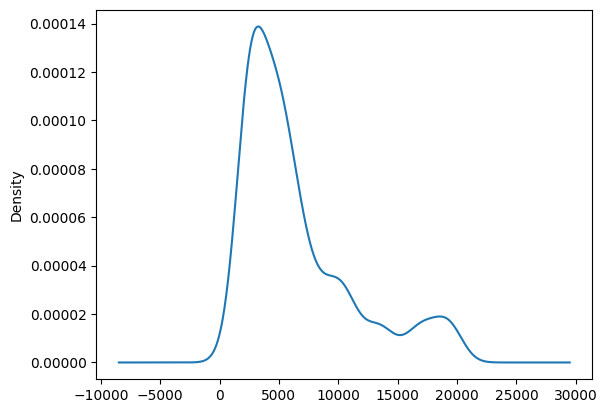

In [17]:
df['MonthlyIncome'].plot(kind='kde')

Add a Boxplot to detect outliers and the scale of the data

<Axes: >

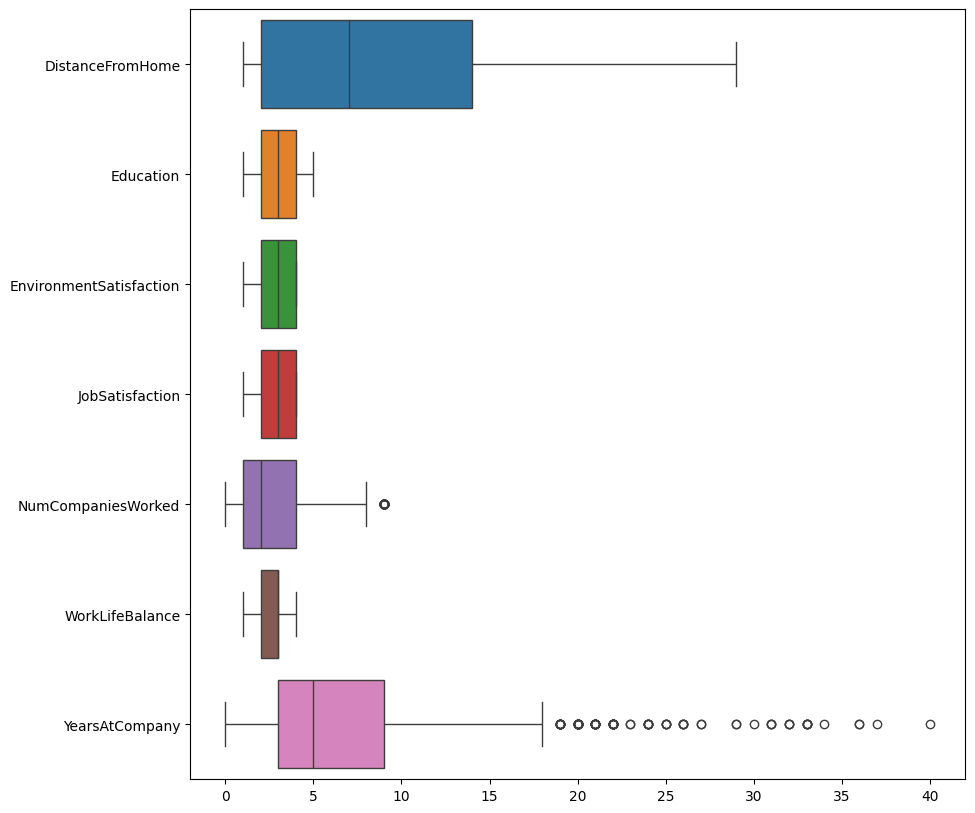

In [25]:
data_without_income = df.drop(['MonthlyIncome', 'Age'], axis=1)
plt.figure(figsize=(10, 10))
sns.boxplot(data=data_without_income, orient='h')

<Axes: xlabel='MonthlyIncome'>

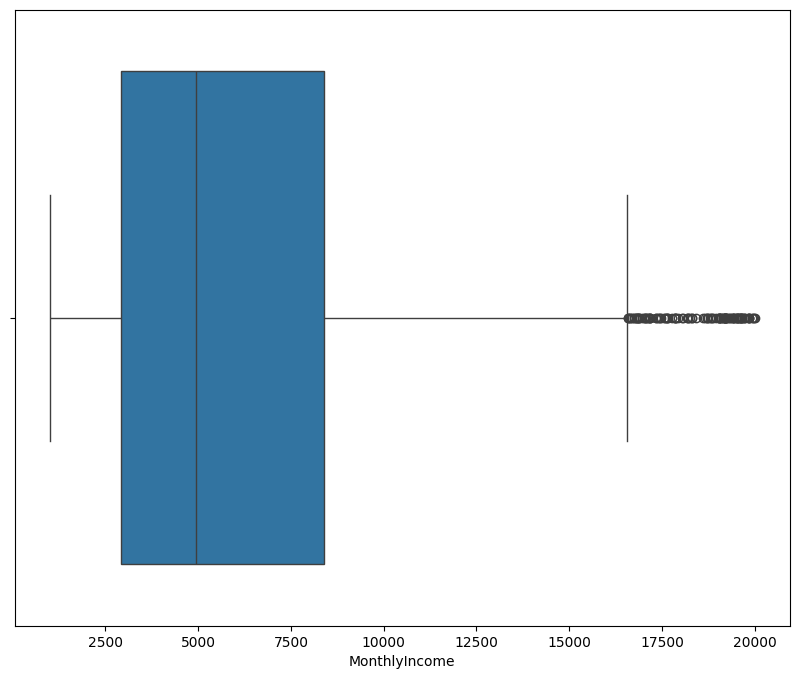

In [30]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df['MonthlyIncome'], orient='h')

<Axes: xlabel='Age'>

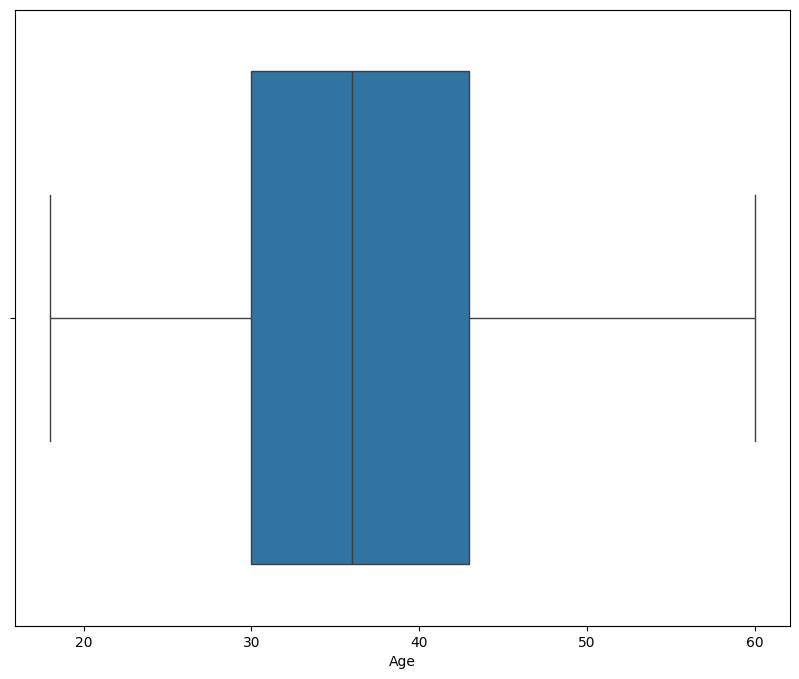

In [31]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df['Age'], orient='h')

### Bi-variate Analysis

In [ ]:
correlation = df.corr(numeric_only=True)
correlation

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
Age,1.000000,-0.001686,0.208034,0.010146,-0.004892,0.497359,0.299635,-0.021573,0.311074
DistanceFromHome,-0.001686,1.000000,0.021042,-0.016075,-0.003669,-0.017530,-0.029251,-0.024995,0.009708
Education,0.208034,0.021042,1.000000,-0.027128,-0.011296,0.094569,0.126317,0.009886,0.068593
EnvironmentSatisfaction,0.010146,-0.016075,-0.027128,1.000000,-0.006784,-0.005510,0.012594,0.027826,0.001714
JobSatisfaction,-0.004892,-0.003669,-0.011296,-0.006784,1.000000,-0.008843,-0.055699,-0.019286,-0.002952
MonthlyIncome,0.497359,-0.017530,0.094569,-0.005510,-0.008843,1.000000,0.148770,0.031009,0.513625
NumCompaniesWorked,0.299635,-0.029251,0.126317,0.012594,-0.055699,0.148770,1.000000,-0.007401,-0.118667
WorkLifeBalance,-0.021573,-0.024995,0.009886,0.027826,-0.019286,0.031009,-0.007401,1.000000,0.012438
YearsAtCompany,0.311074,0.009708,0.068593,0.001714,-0.002952,0.513625,-0.118667,0.012438,1.000000


<Axes: >

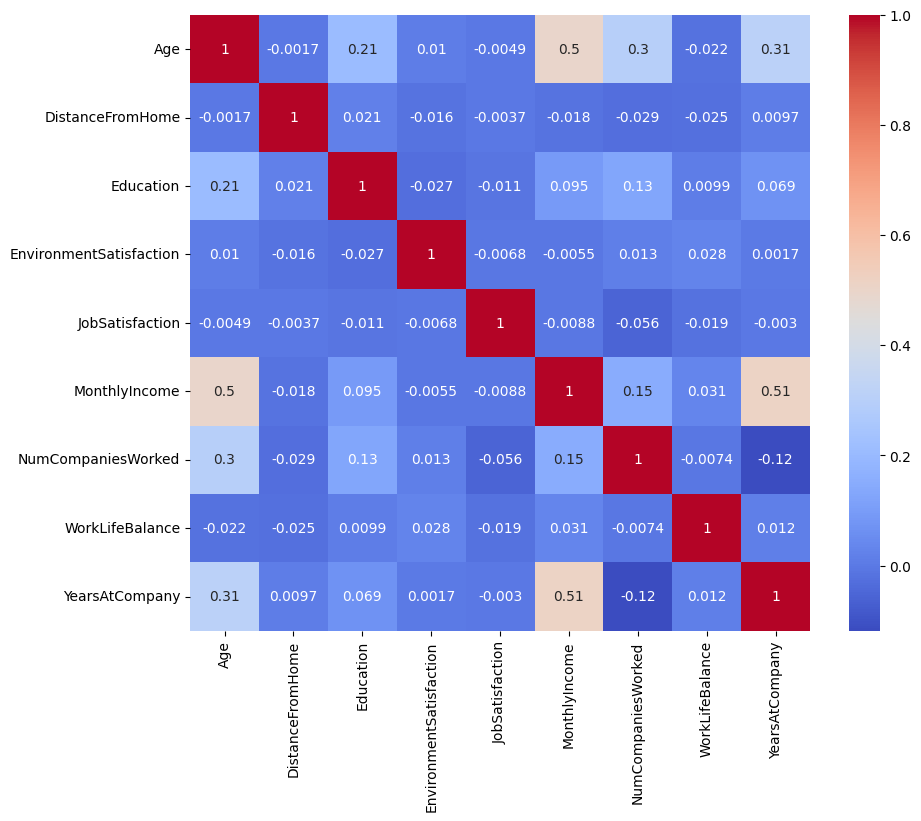

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(data=correlation, annot=True, cmap='coolwarm')

Key Insights: There seem not to be a strong positive correlations between the features, except for Age and Monthly Income which showed more moderate correlation (positive)

### Multivariate Analysis

In [ ]:
df.columns

Index(['Age', 'Attrition', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'WorkLifeBalance', 'YearsAtCompany'],
      dtype='object')

<Figure size 1200x1000 with 0 Axes>

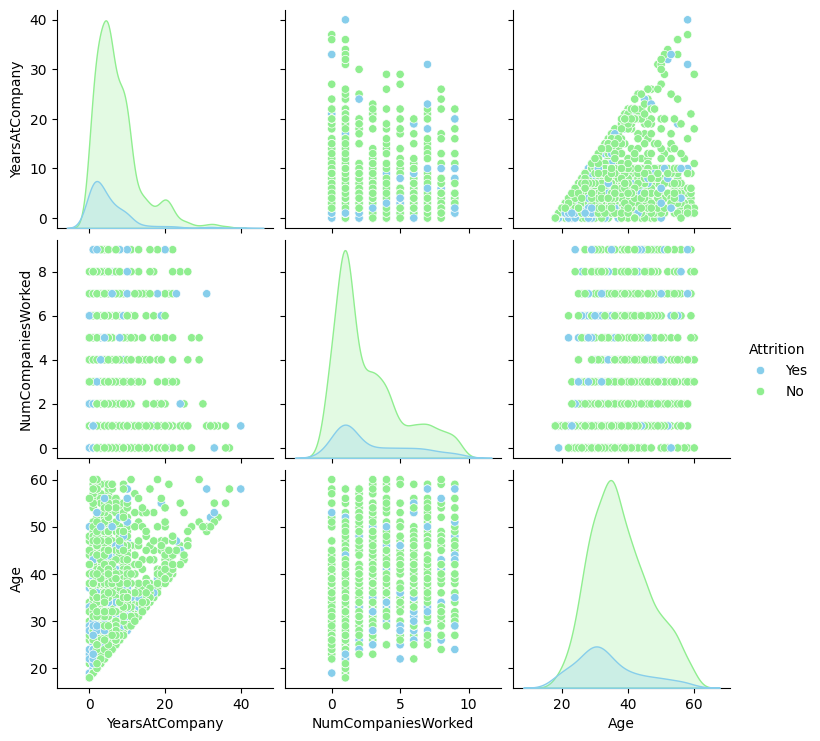

In [108]:
data = df[['Attrition', 'YearsAtCompany', 'NumCompaniesWorked', 'Age']]
plt.figure(figsize=(12, 10))
sns.pairplot(data, hue='Attrition', palette={'Yes': 'skyblue', 'No': 'lightgreen'})
plt.show()

### Answering Analytical Questions

##### 1. Which department is more likely to leave the company?

In [ ]:
df.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993.0,8,1.0,6.0
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130.0,1,3.0,10.0
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090.0,6,3.0,0.0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909.0,1,3.0,8.0
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468.0,9,3.0,2.0


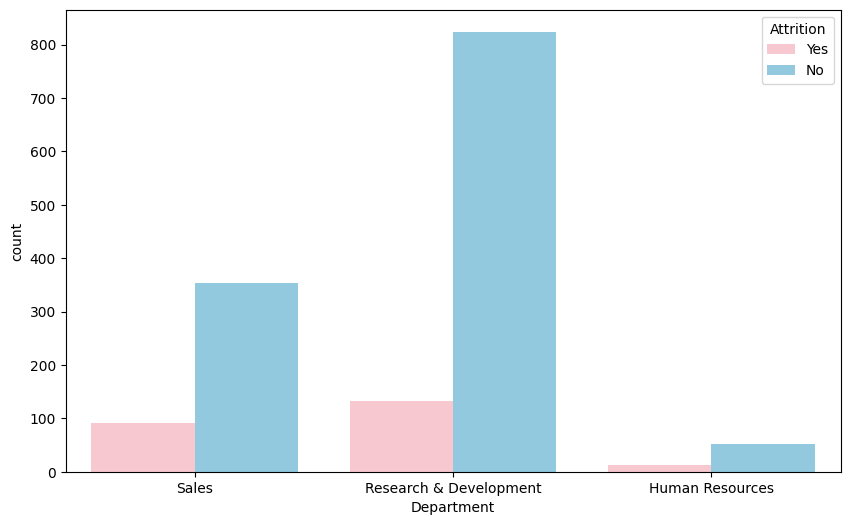

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Department', hue='Attrition', palette={'Yes': 'pink', 'No': 'skyblue'})
plt.show()

### Counting Attrition by Department

In [68]:
attrition_by_department = df.groupby('Department')['Attrition'].apply(lambda x: (x == 'Yes').sum())
attrition_by_department

Department
Human Resources            12
Research & Development    132
Sales                      92
Name: Attrition, dtype: int64

In [102]:
grouped_data = df.groupby(['Department', 'Attrition'])['Attrition'].count().rename('Breakdown').reset_index()
grouped_data

,Department,Attrition,Breakdown
0,Human Resources,No,51
1,Human Resources,Yes,12
2,Research & Development,No,824
3,Research & Development,Yes,132
4,Sales,No,354
5,Sales,Yes,92


In [106]:
grouped_data['Ratio'] = grouped_data.groupby('Department')['Breakdown'].transform(lambda x: (x / x.sum() * 100))
grouped_data

,Department,Attrition,Breakdown,Ratio
0,Human Resources,No,51,80.952381
1,Human Resources,Yes,12,19.047619
2,Research & Development,No,824,86.192469
3,Research & Development,Yes,132,13.807531
4,Sales,No,354,79.372197
5,Sales,Yes,92,20.627803


##### 2. What is the percentage of Attrition for IBM?

Text(0.5, 1.0, 'The Atrrition distribution')

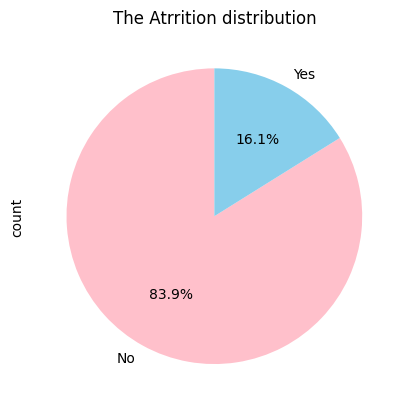

In [ ]:
df['Attrition'].value_counts().plot.pie(startangle=90, colors=['pink', 'skyblue'], autopct='%1.1f%%')
plt.title('The Atrrition distribution')

##### 3. How satisfied are employees after 3 years at IMB?

In [110]:
df.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993.0,8,1.0,6.0
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130.0,1,3.0,10.0
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090.0,6,3.0,0.0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909.0,1,3.0,8.0
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468.0,9,3.0,2.0


This is the breakdown of the Job satisfaction rating

In [131]:
df.groupby(['JobSatisfaction', 'Attrition'])['Department'].count().rename('Total').reset_index()

,JobSatisfaction,Attrition,Total
0,1,No,222
1,1,Yes,66
2,2,No,234
3,2,Yes,46
4,3,No,368
5,3,Yes,72
6,4,No,405
7,4,Yes,52


Now lets find the job satisfaction for the employees after 3 years

In [144]:
after_three_years = df[df['YearsAtCompany'] > 3]
after_three_years.shape

(999, 13)

In [147]:
after_three_years[['JobSatisfaction', 'Attrition']].groupby(['JobSatisfaction', 'Attrition'])['Attrition'].count().rename('Count').reset_index()

,JobSatisfaction,Attrition,Count
0,1,No,165
1,1,Yes,31
2,2,No,169
3,2,Yes,22
4,3,No,262
5,3,Yes,32
6,4,No,289
7,4,Yes,29


#### Final Insights

1. The soso